## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [43]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [44]:
reviews, Y = reviews[0], Y[0]
Y.mean() # check if ratings are balanced (i.e. = 0.5)

np.float64(0.5)

In [45]:
# train - val - test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reviews, Y, test_size=0.15, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=7)

# reset indices
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# dataset cardinalities
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18062,), (18062,), (3188,), (3188,), (3750,), (3750,))

In [46]:
# bag-of-words (no sequential information, no information on importance of words, just frequency per text)
from sklearn.feature_extraction.text import CountVectorizer

# initialize with max 10k words
bow = CountVectorizer(max_features=10000)

# fit on entire body of text
X_train_bow = bow.fit_transform(X_train)
X_val_bow = bow.transform(X_val)
X_test_bow = bow.transform(X_test)

# get vocabulary, should be 10k size
vocab = bow.get_feature_names_out()
print("Vocabulary size:", len(vocab))

# let's look at a single sample, e.g. index 101
print("Raw text:", X_train[101]) # raw text
print("Word vector:", X_train_bow[101].toarray()[0], " - length:", len(X_train_bow[101].toarray()[0])) # word vector

# let's match word vector vocabulary and sort by count
word_counts = {vocab[i]:c for i, c in enumerate(X_train_bow[101].toarray()[0]) if c > 0}
word_counts = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

# let's see which words are the most important in this text
print(word_counts)

Vocabulary size: 10000
Raw text: frank sinatra was far from the ideal actor for westerns . he was a great actor  from here to eternity and the man with the golden arm are a proof of that  but he did not have the physique of a western hero  you identified him as an urban guy . but he tried to do his job well in johnny concho  the fact that the film was a failure at the box office was not his fault . i blame it on two factors a  the story was too unusual  specially in the fact that sinatra behaves more like a villain than as a hero throughout the movie . in a genre where people kind of expected a certain pattern  to break away from it the film has to be very good . b  the story is not convincing  it is hard to believe that a whole town will allow sinatra to do anything he wants just because they are afraid of his brother . also when a man shows him a special holster that will open sideways so he has not to draw the gun you wonder that if that will make him invincible  why all the gunfigh

# TF-IDF

Term Frequency - Inverse Document Frequency.

In [47]:
# tf-idf with n-grams and stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize with max 10k words
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 3),  # bigrams, unigrams, trigrams
    min_df=2,            # minimum document frequency (absolute value)
    max_df=0.9,          # maximum document frequency (as a fraction)
    stop_words='english' # get rid of "and", "to", "the", etc
)

# fit on entire body of text
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

# get vocabulary, should be 10k size
vocab = tfidf.get_feature_names_out()
print("Vocabulary size:", len(vocab))

# let's look at a single sample, e.g. index 101
print("Raw text:", X_train[101]) # raw text
print("Word vector:", X_train_tfidf[101].toarray()[0], " - length:", len(X_train_tfidf[101].toarray()[0])) # word vector

# let's match word vector vocabulary and sort by tfidf score
word_scores = {vocab[i]:score for i, score in enumerate(X_train_tfidf[101].toarray()[0]) if score > 0}
word_scores = dict(sorted(word_scores.items(), key=lambda x: x[1], reverse=True))

# let's see which words are the most important in this text based on tf-idf scores
print(word_scores)

Vocabulary size: 10000
Raw text: frank sinatra was far from the ideal actor for westerns . he was a great actor  from here to eternity and the man with the golden arm are a proof of that  but he did not have the physique of a western hero  you identified him as an urban guy . but he tried to do his job well in johnny concho  the fact that the film was a failure at the box office was not his fault . i blame it on two factors a  the story was too unusual  specially in the fact that sinatra behaves more like a villain than as a hero throughout the movie . in a genre where people kind of expected a certain pattern  to break away from it the film has to be very good . b  the story is not convincing  it is hard to believe that a whole town will allow sinatra to do anything he wants just because they are afraid of his brother . also when a man shows him a special holster that will open sideways so he has not to draw the gun you wonder that if that will make him invincible  why all the gunfigh

Training Bag-of-Words model...
Epoch 1/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7804 - loss: 0.4779 - val_accuracy: 0.8902 - val_loss: 0.2872
Epoch 2/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9291 - loss: 0.2052 - val_accuracy: 0.8695 - val_loss: 0.3156
Epoch 3/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9521 - loss: 0.1439 - val_accuracy: 0.8752 - val_loss: 0.3105
Epoch 4/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9725 - loss: 0.0979 - val_accuracy: 0.8789 - val_loss: 0.3235
Epoch 5/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9818 - loss: 0.0719 - val_accuracy: 0.8761 - val_loss: 0.3460

Training TF-IDF model...
Epoch 1/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7446 - loss: 0.6106 - val_accuracy: 0.8698 - val_loss: 0.3672
Epoch 2/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9044 - loss: 0.3006 - val_accuracy: 0.8896 - val_loss: 0.2834
Epoch 3/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step 

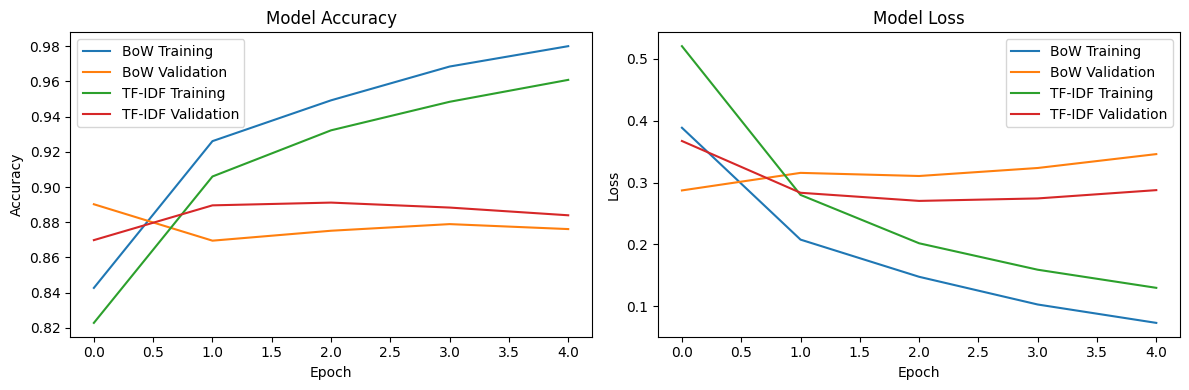

In [48]:
# train simple neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import AdamW

# model parameters
input_dim = 10000 # from max_features in vectorizers
hidden_dim = 64   # parameters in layer 1
output_dim = 1    # parameters in layer 2, output layer, binary classification

# training parameters
epochs = 5
batch_size = 128

# function to create model (same architecture for both)
def create_model():
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(hidden_dim, activation='relu'),
        Dropout(0.25),  # mitigate overfitting
        Dense(output_dim, activation='sigmoid')
    ])
    model.compile(
        optimizer=AdamW(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# train BoW model
print("Training Bag-of-Words model...")
bow_model = create_model()
bow_history = bow_model.fit(
    X_train_bow.toarray(),
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_bow, y_val),
    verbose=1
)

# train TF-IDF model
print("\nTraining TF-IDF model...")
tfidf_model = create_model()
tfidf_history = tfidf_model.fit(
    X_train_tfidf.toarray(),
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_tfidf, y_val),
    verbose=1
)

# compare final validation accuracies
print("\nFinal Results:")
print(f"BoW Model - Validation Accuracy: {bow_history.history['val_accuracy'][-1]:.4f}")
print(f"TF-IDF Model - Validation Accuracy: {tfidf_history.history['val_accuracy'][-1]:.4f}")

# optional: plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# plot accuracy
plt.subplot(1, 2, 1)
plt.plot(bow_history.history['accuracy'], label='BoW Training')
plt.plot(bow_history.history['val_accuracy'], label='BoW Validation')
plt.plot(tfidf_history.history['accuracy'], label='TF-IDF Training')
plt.plot(tfidf_history.history['val_accuracy'], label='TF-IDF Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# plot loss
plt.subplot(1, 2, 2)
plt.plot(bow_history.history['loss'], label='BoW Training')
plt.plot(bow_history.history['val_loss'], label='BoW Validation')
plt.plot(tfidf_history.history['loss'], label='TF-IDF Training')
plt.plot(tfidf_history.history['val_loss'], label='TF-IDF Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

### From here we can try to improve upon our neural network and try to better improve the accuracy

Here we are only using the BoW (Bag of words).

As based on the above model. BoW was performing better.

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the neural network
def create_model(hidden_dim=64, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Input(shape=(10000,)),
        Dense(hidden_dim, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Set hyperparameters
hidden_dim = 64
dropout_rate = 0.3
learning_rate = 0.001
epochs = 10
batch_size = 128

# Train the model
model = create_model(hidden_dim, dropout_rate, learning_rate)
history = model.fit(
    X_train_bow.toarray(), y_train,
    validation_data=(X_val_bow.toarray(), y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_bow.toarray(), y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7698 - loss: 0.4881 - val_accuracy: 0.8811 - val_loss: 0.2878
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9249 - loss: 0.2144 - val_accuracy: 0.8755 - val_loss: 0.3060
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9499 - loss: 0.1521 - val_accuracy: 0.8833 - val_loss: 0.2959
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9692 - loss: 0.1014 - val_accuracy: 0.8701 - val_loss: 0.3419
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9792 - loss: 0.0761 - val_accuracy: 0.8767 - val_loss: 0.3485
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9887 - loss: 0.0508 - val_accuracy: 0.8711 - val_loss: 0.3900
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9922 - loss: 0.0404 - val_accuracy: 0.8730 - val_loss: 0.4491
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9948 - loss: 0.0309 - val_accuracy: 0.

## Characteristics of the Network:
#### Input Layer:

The input layer receives a Bag-of-Words (BoW) representation of the text.
BoW is a fixed-size vector (of size 10,000 in this case), where each feature corresponds to the frequency or presence of a specific word in the text.
#### Hidden Layer:

The network includes one hidden layer with a specified number of neurons (hidden_dim=64 in this case).
This layer uses the ReLU (Rectified Linear Unit) activation function, which helps the network learn complex patterns by introducing non-linearity.
#### Dropout:

A Dropout layer is added after the hidden layer to reduce overfitting by randomly deactivating neurons during training.
#### Output Layer:

The final layer is a single neuron with a sigmoid activation function.
The sigmoid function outputs a value between 0 and 1, suitable for binary classification tasks (e.g., "positive" vs. "negative" sentiment).
#### Compilation:

The network is compiled with the binary cross-entropy loss function, which is standard for binary classification.
It uses the Adam optimizer, a widely-used adaptive optimization algorithm.


### Lets try with our own sentences now

In [62]:
# Classify custom sentences
custom_sentences = [
    "I absolutely loved the movie, it was fantastic!",
    "The plot was so exciting i wanted to leave early and never see it again",
    "Great acting, but the story was mediocre at best.",
    "Terrible movie, I would not recommend it to anyone.",
    "An absolute masterpiece, one of the best films I've ever seen.",
    "Overall, the movie was good, but i felt it could have been far more exiting."
]

# Transform custom sentences to Bag-of-Words
custom_bow = bow.transform(custom_sentences)
predictions = model.predict(custom_bow.toarray())

# Display predictions
for sentence, pred in zip(custom_sentences, predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Sentence: '{sentence}'\nPredicted Sentiment: {sentiment} ({pred[0]:.4f})\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sentence: 'I absolutely loved the movie, it was fantastic!'
Predicted Sentiment: Positive (0.8209)

Sentence: 'The plot was so exciting i wanted to leave early and never see it again'
Predicted Sentiment: Positive (0.5176)

Sentence: 'Great acting, but the story was mediocre at best.'
Predicted Sentiment: Negative (0.3350)

Sentence: 'Terrible movie, I would not recommend it to anyone.'
Predicted Sentiment: Negative (0.1155)

Sentence: 'An absolute masterpiece, one of the best films I've ever seen.'
Predicted Sentiment: Positive (0.8900)

Sentence: 'Overall, the movie was good, but i felt it could have been far more exiting.'
Predicted Sentiment: Positive (0.5317)



#### Why This Type of Neural Network?
Suitability for Structured Input:

Dense neural networks are ideal when the input is a fixed-length vector (e.g., the Bag-of-Words representation of text).

Simple Binary Classification:

With just one hidden layer, this network is relatively simple and well-suited for a binary sentiment analysis task.

Text Features as Input:

The Bag-of-Words model produces numerical features, which work well with dense layers. No sequential or temporal information (like word order) is considered here.

## Overall

We can see that the final model is able to predict with a good level of accuracy the sentiment in new sentences given.

It could be made more complex but for the purpose of this assignment it fits the purpose required, which would appear to be to gauge the sentiment from reviews for shows/movies.

It does this well, given reviews can be very mixed and even have words that may make it appear a positive review but in reality is sarcasm